In [32]:
import json
import paths
from collections import defaultdict

extractors = [
    'backward_extractor',
    'forward_extractor',
    'simple_forward_extractor',
]

plot_colors: dict[str, str] = {}
plot_colors['backward_extractor'] = '#0fa'
plot_colors['forward_extractor'] = '#f0a'
plot_colors['simple_forward_extractor'] = '#0af'


tables_by_type = None

papers_by_number_of_tables: dict[str, dict[int, list[str]]] = defaultdict(dict)
papers_by_number_of_references: dict[str, dict[int, list[str]]] = defaultdict(dict)
papers_by_number_of_footnotes: dict[str, dict[int, list[str]]] = defaultdict(dict)
paper_table_number_of_references: dict[str, dict[int, dict[str, list[str]]]] = defaultdict(dict)
paper_table_without_caption: dict[str, dict[str, list[str]]] = defaultdict(dict)
paper_table_without_references: dict[str, dict[str, list[str]]] = defaultdict(dict)

total_tables_extracted: dict[str, int] = {}
papers_without_caption: dict[str, int] = {}
papers_with_footnotes: dict[str, int] = {}

for extractor in extractors:
    with open(f'{paths.STATS_FOLDER}/{extractor}_stats.json', 'r') as file:
        file_content = file.read()
        paper_data = json.loads(file_content)

        papers_by_number_of_tables[extractor] = paper_data['papers_by_number_of_tables']
        papers_by_number_of_references[extractor] = paper_data['papers_by_number_of_references']
        papers_by_number_of_footnotes[extractor] = paper_data['papers_by_number_of_footnotes']
        paper_table_number_of_references[extractor] = paper_data['paper_table_number_of_references']
        paper_table_without_caption[extractor] = paper_data['paper_table_without_caption']
        paper_table_without_references[extractor] = paper_data['paper_table_without_references']

        total_tables_extracted[extractor] = 0
        for num, papers in papers_by_number_of_tables[extractor].items():
            total_tables_extracted[extractor] += int(num) * len(papers)

        papers_without_caption[extractor] = 0
        for tables in paper_table_without_caption[extractor].values():
            papers_without_caption[extractor] += len(tables)

        papers_with_footnotes[extractor] = 0
        for num, papers in papers_by_number_of_footnotes[extractor].items():
            if num == 0:
                continue
            papers_with_footnotes[extractor] += len(papers)        
        

with open(f'{paths.STATS_FOLDER}/tables_by_type_stats.json', 'r') as file:
    file_content = file.read()
    tables_by_type = json.loads(file_content)["tables_by_type"]

In [33]:
for extractor in extractors:
    print(f'Extractor: {extractor}')
    print(f'Total tables extracted: {total_tables_extracted[extractor]}')
    print(f'Papers without tables: {len(papers_by_number_of_tables[extractor]['0'])}')
    print(f'Papers without caption: {papers_without_caption[extractor]}')
    print(f'Papers without references: {len(papers_by_number_of_references[extractor]['0'])}')

    print(f'Papers with footnotes: {papers_with_footnotes[extractor]}')
    print()

total_tables = 0
types = ['table', 'figure', 'equation', 'example', 'algorithm', 'unknown']
print('Tables by type:')
for type in types:
    n = len(tables_by_type.get(type, []))
    print(f'{type}: {n}')
    total_tables += n
print(f'\nTotal tables: {total_tables}')


Extractor: backward_extractor
Total tables extracted: 2915
Papers without tables: 107
Papers without caption: 129
Papers without references: 119
Papers with footnotes: 652

Extractor: forward_extractor
Total tables extracted: 2542
Papers without tables: 120
Papers without caption: 23
Papers without references: 128
Papers with footnotes: 652

Extractor: simple_forward_extractor
Total tables extracted: 2618
Papers without tables: 108
Papers without caption: 23
Papers without references: 231
Papers with footnotes: 652

Tables by type:
table: 3283
figure: 259
equation: 5227
example: 0
algorithm: 6
unknown: 95

Total tables: 8870


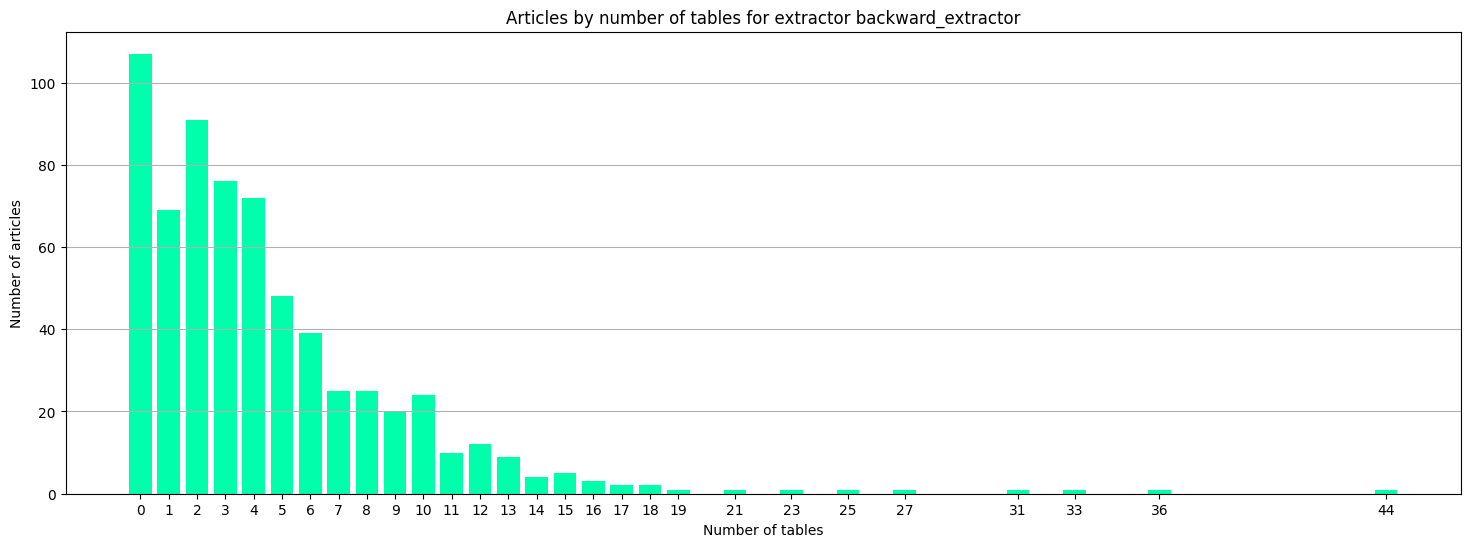

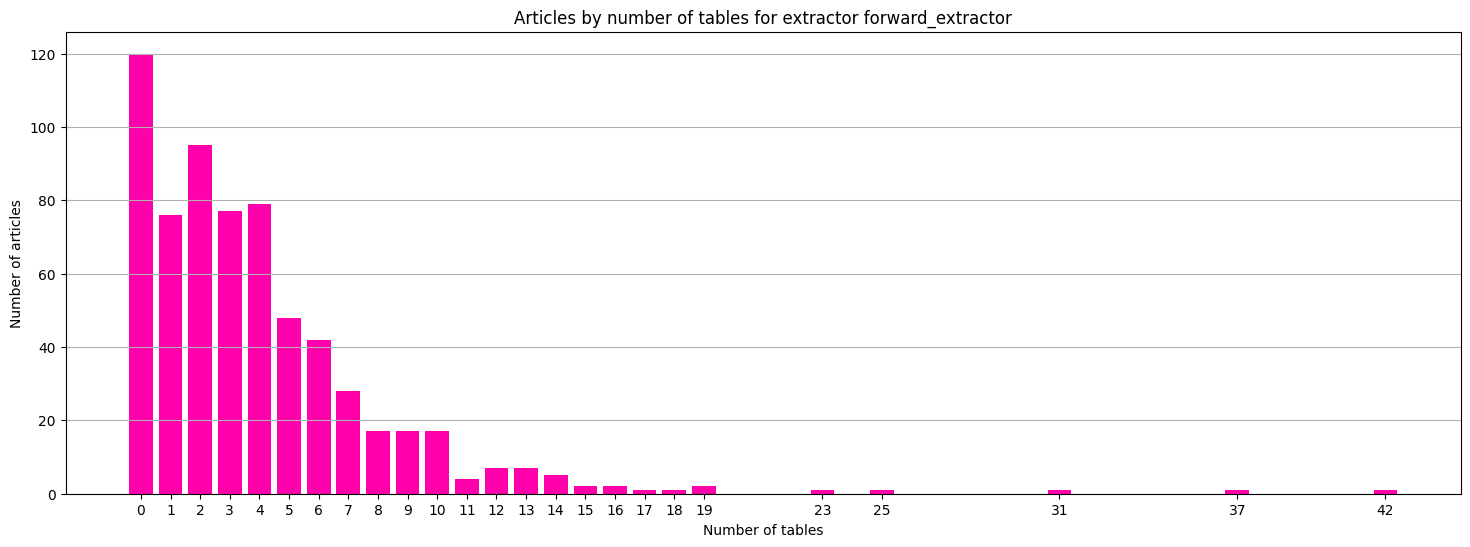

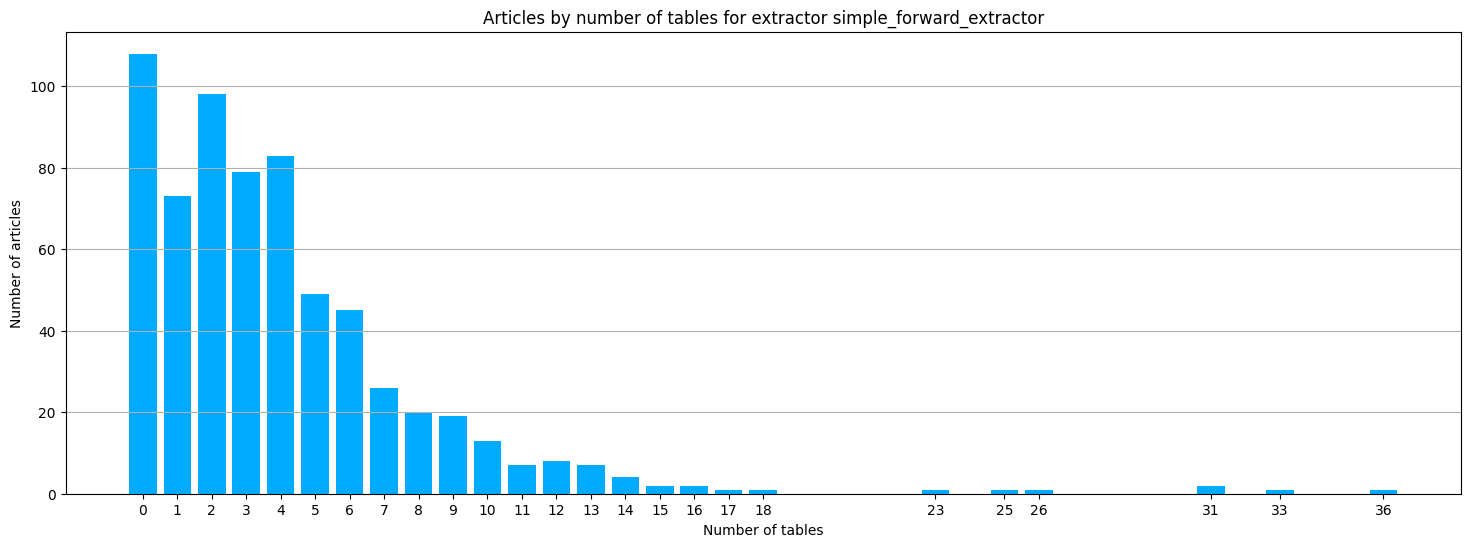

In [34]:
import matplotlib.pyplot as plt

for extractor in extractors:
    keys = list(map(int, papers_by_number_of_tables[extractor].keys()))
    values = list(map(len, papers_by_number_of_tables[extractor].values()))

    plt.figure(figsize=(18, 6))
    plt.bar(keys, values, color=plot_colors[extractor])

    plt.xlabel('Number of tables')
    plt.ylabel('Number of articles')
    plt.title(f'Articles by number of tables for extractor {extractor}')
    plt.xticks(keys) 

    plt.grid(axis='y')
    plt.show()

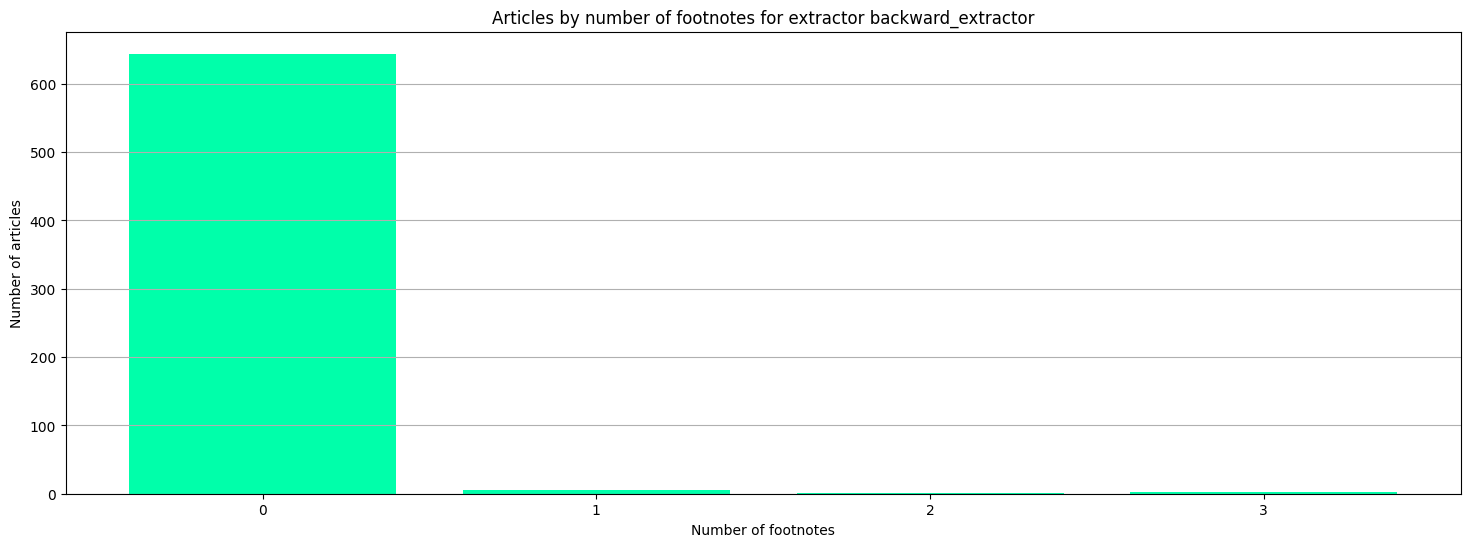

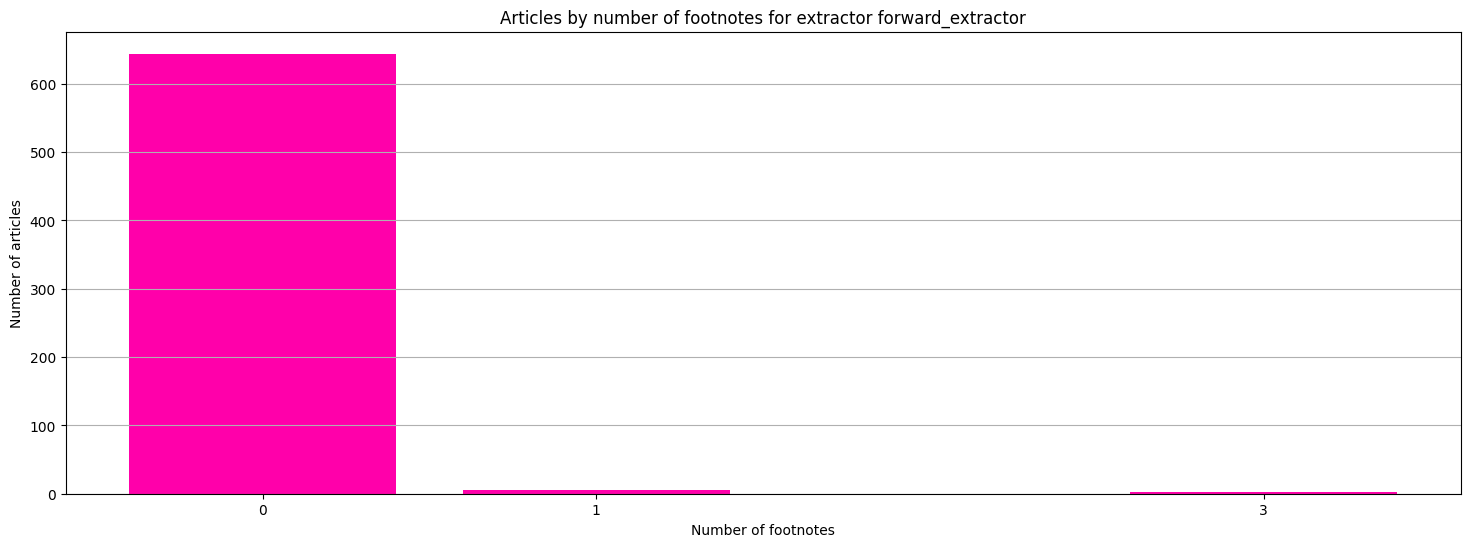

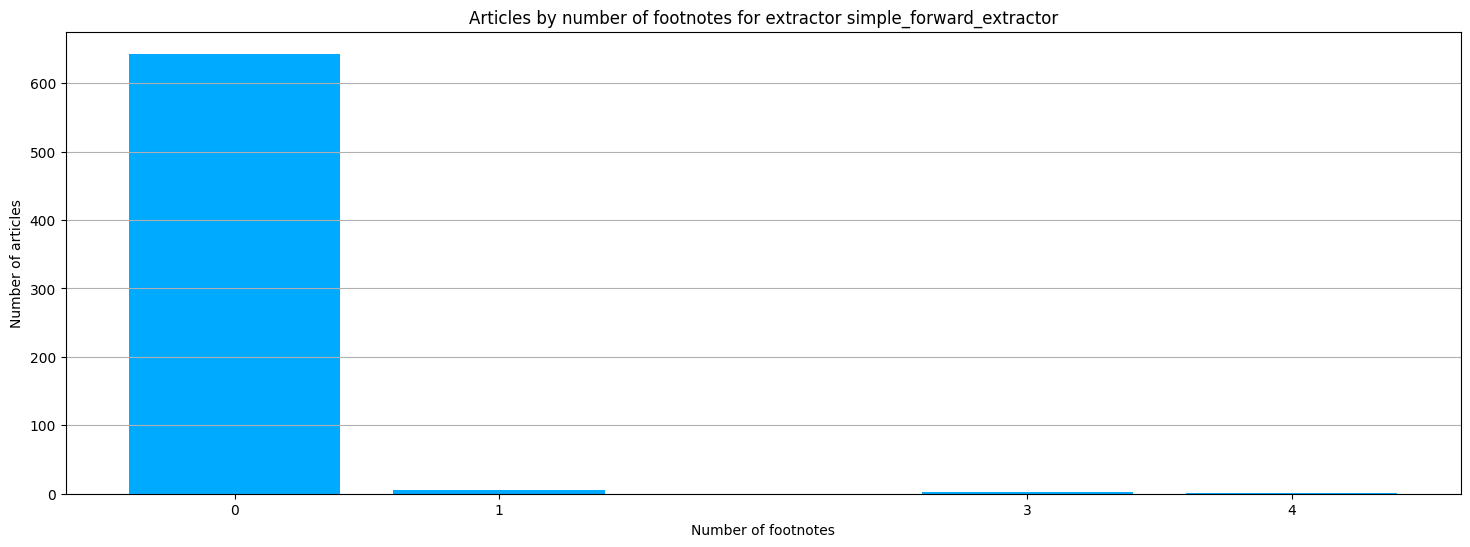

In [35]:
for extractor in extractors:
    keys = list(map(int, papers_by_number_of_footnotes[extractor].keys()))
    values = list(map(len, papers_by_number_of_footnotes[extractor].values()))

    plt.figure(figsize=(18, 6))
    plt.bar(keys, values, color=plot_colors[extractor])

    plt.xlabel('Number of footnotes')
    plt.ylabel('Number of articles')
    plt.title(f'Articles by number of footnotes for extractor {extractor}')
    plt.xticks(keys) 

    plt.grid(axis='y')
    plt.show()

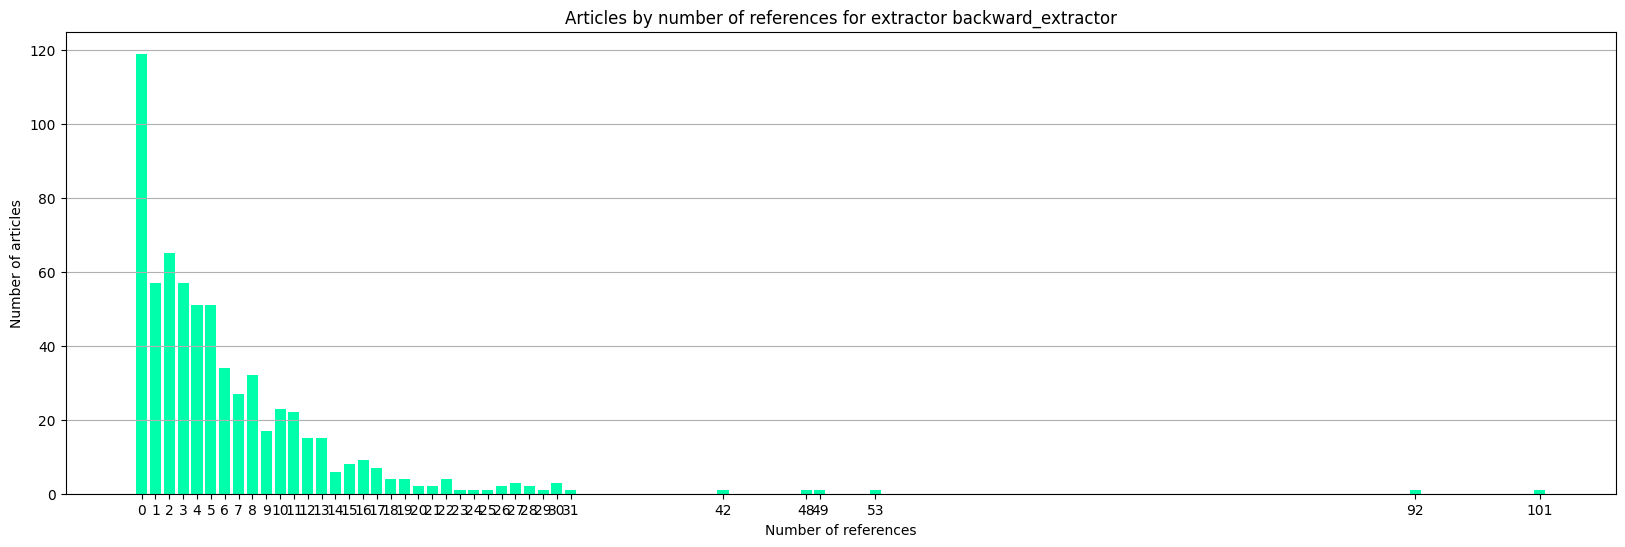

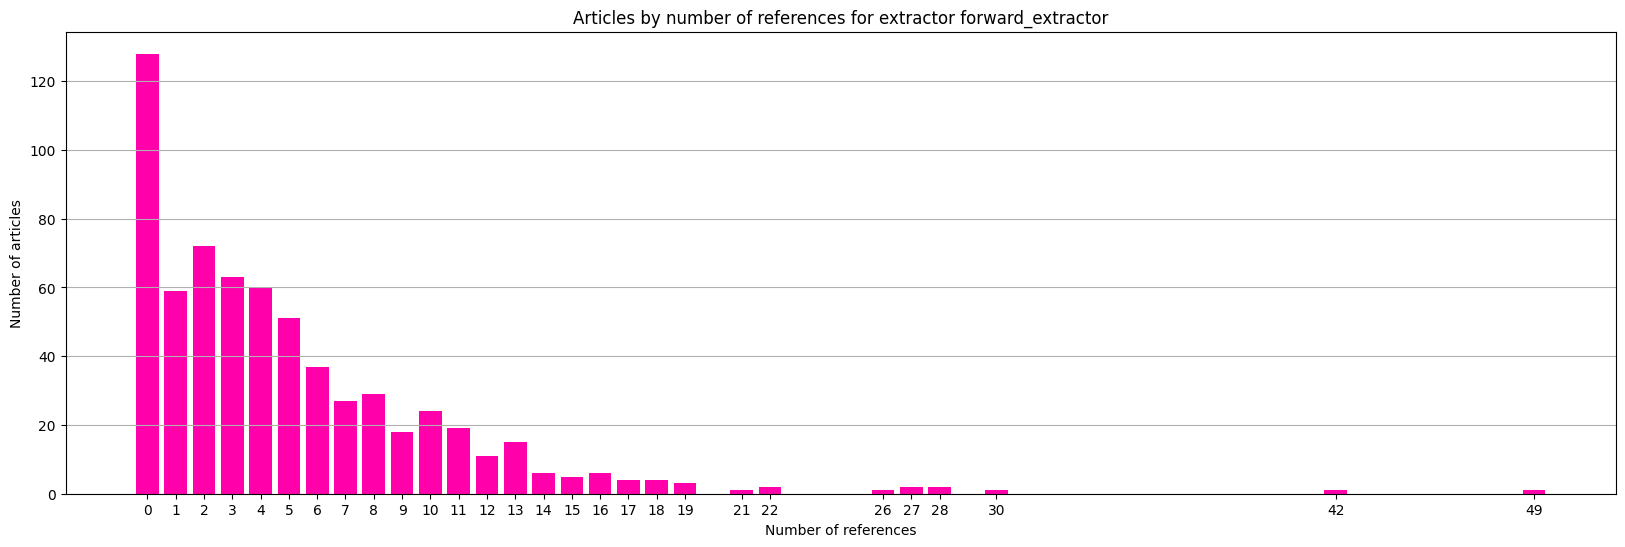

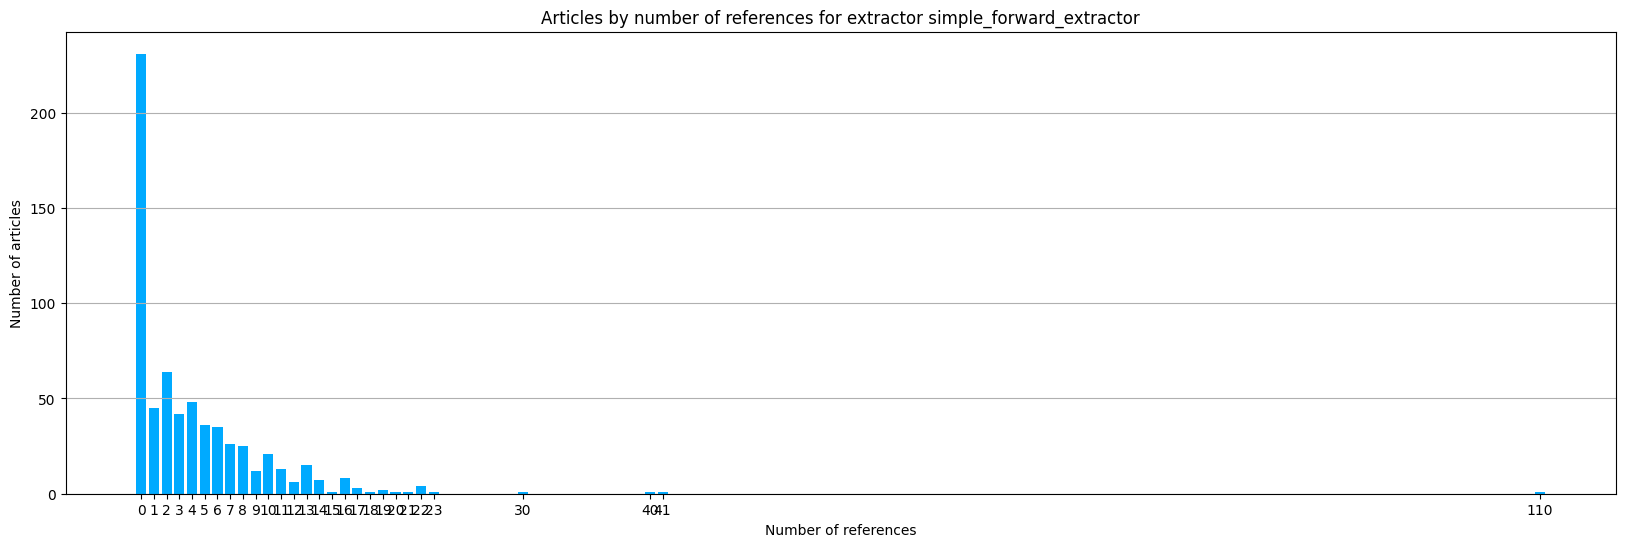

In [36]:
for extractor in extractors:
    keys = list(map(int, papers_by_number_of_references[extractor].keys()))
    values = list(map(len, papers_by_number_of_references[extractor].values()))

    plt.figure(figsize=(20, 6))
    plt.bar(keys, values, color=plot_colors[extractor])

    plt.xlabel('Number of references')
    plt.ylabel('Number of articles')
    plt.title(f'Articles by number of references for extractor {extractor}')
    plt.xticks(keys) 

    plt.grid(axis='y')
    plt.show()

In [37]:

sorted_by_values = sorted(num_tab_ref_dict.values())

max_value = sorted_by_values[-1]

def count_floats_in_intervals(intervals):
    # Initialize a dictionary to hold the counts
    counts = {interval: 0 for interval in intervals}

    # Iterate through each float in the array
    for num in sorted_by_values:
        # Check each interval
        
        for i in range(len(intervals) - 1):
            if intervals[i] <= num < intervals[i + 1]:
                if counts.get(intervals[i]) is None:
                    counts[intervals[i]] = 0
                counts[intervals[i]] += 1

    return counts

step = 0.2
intervals = [i * step for i in range(int(max_value/step) + 1)]

counts_dict = count_floats_in_intervals(intervals)

interval_labels = list(counts_dict.keys())
counts = list(counts_dict.values())

indices = list(range(len(list(sorted_by_values))))

plt.figure(figsize=(20, 6))
plt.plot(interval_labels, counts, color='green', marker='o', linestyle='solid')

# Adding labels and title
plt.xlabel('Ratio')
plt.ylabel('Number of articles')
plt.title('Articles by ratio of references to tables')
plt.xticks(interval_labels)
plt.xlim(-0.1, max_value + 0.1)


# Show the plot with grid
plt.grid(axis='y')
plt.show()

num_paper_with_tables_with_zero_references = 0
for key, value in counts_dict.items():
    if key < 1:
        num_paper_with_tables_with_zero_references += value

print(f"Number of papers with tables with zero references: {num_paper_with_tables_with_zero_references}")

NameError: name 'num_tab_ref_dict' is not defined